In [1]:
import matplotlib.pyplot as plt


In [14]:
file_name = "cc-main-2020-feb-mar-may-domain.indegree"

In [15]:
x_axis_label = file_name.split(".")[1]
y_axis_label = "Number of PLDs"

In [16]:
frequency = []
x = []
blah = 0
with open(file_name) as a_file:
    for i,line in enumerate(a_file):
        blah += 1
        
        x.append(i)
        frequency.append(int(line.strip()))
print(len(frequency))  

21931936


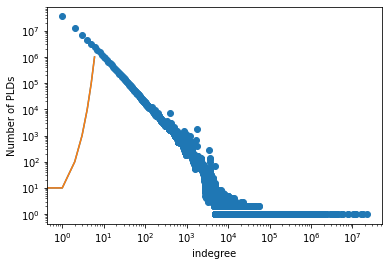

In [17]:
import matplotlib.pylab as plt


y = frequency
x = [i for i in range(len(y))]

plt.semilogy([1,10,100,1000,10000,100000,1000000])
plt.semilogx([1,10,100,1000,10000,100000,1000000])

#plt.semilogx(x)
#plt.semilogy(y)

plt.scatter(x,y)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.show()